# Deep_Learning_from_Scratch_1 - part6

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝(사이토 고키 지음)을 참고하였습니다. 

## 7. 합성곱 신경망(CNN)
#### - CNN은 이미지 인식과 음성 인식 등 다양한 곳에서 활용, 이미지 인식 분야에서 딥러닝을 활용한 기법은 대부분 CNN을 기초로 함

### 7.1 전체 구조
#### - 완전 연결(fully-connected) : 인접하는 계층의 모든 뉴련관 결합된 신경망, Affine 계층
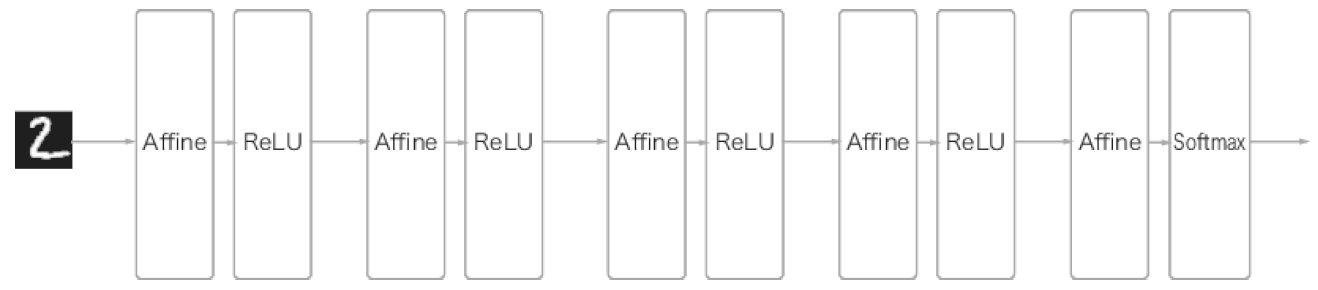
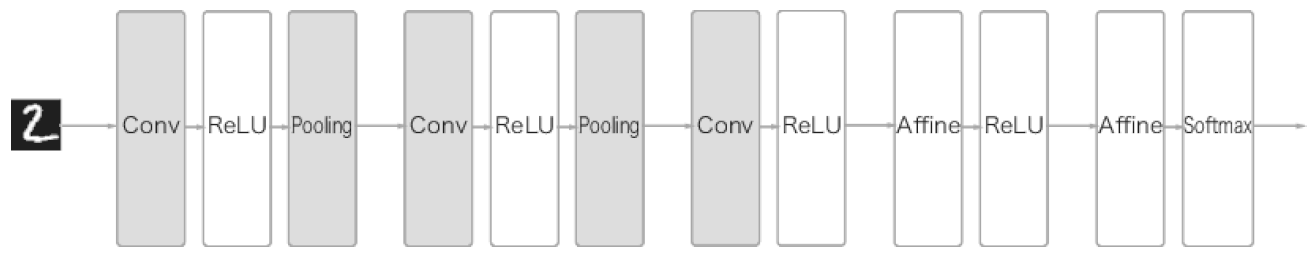


### 7.2 합성곱 계층
#### 7.2.1 완전연결 계층의 문제점
#### - 데이터의 형상이 무시, 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런) 취급하여 형상에 담긴 정보를 활용할 수 없음
#### - 특징 맵(feature map) : 합성곱 계층의 입출력 데이터
#### 7.2.2 합성곱 연산
#### - 합성곱 연산 = 필터(커널) 연산
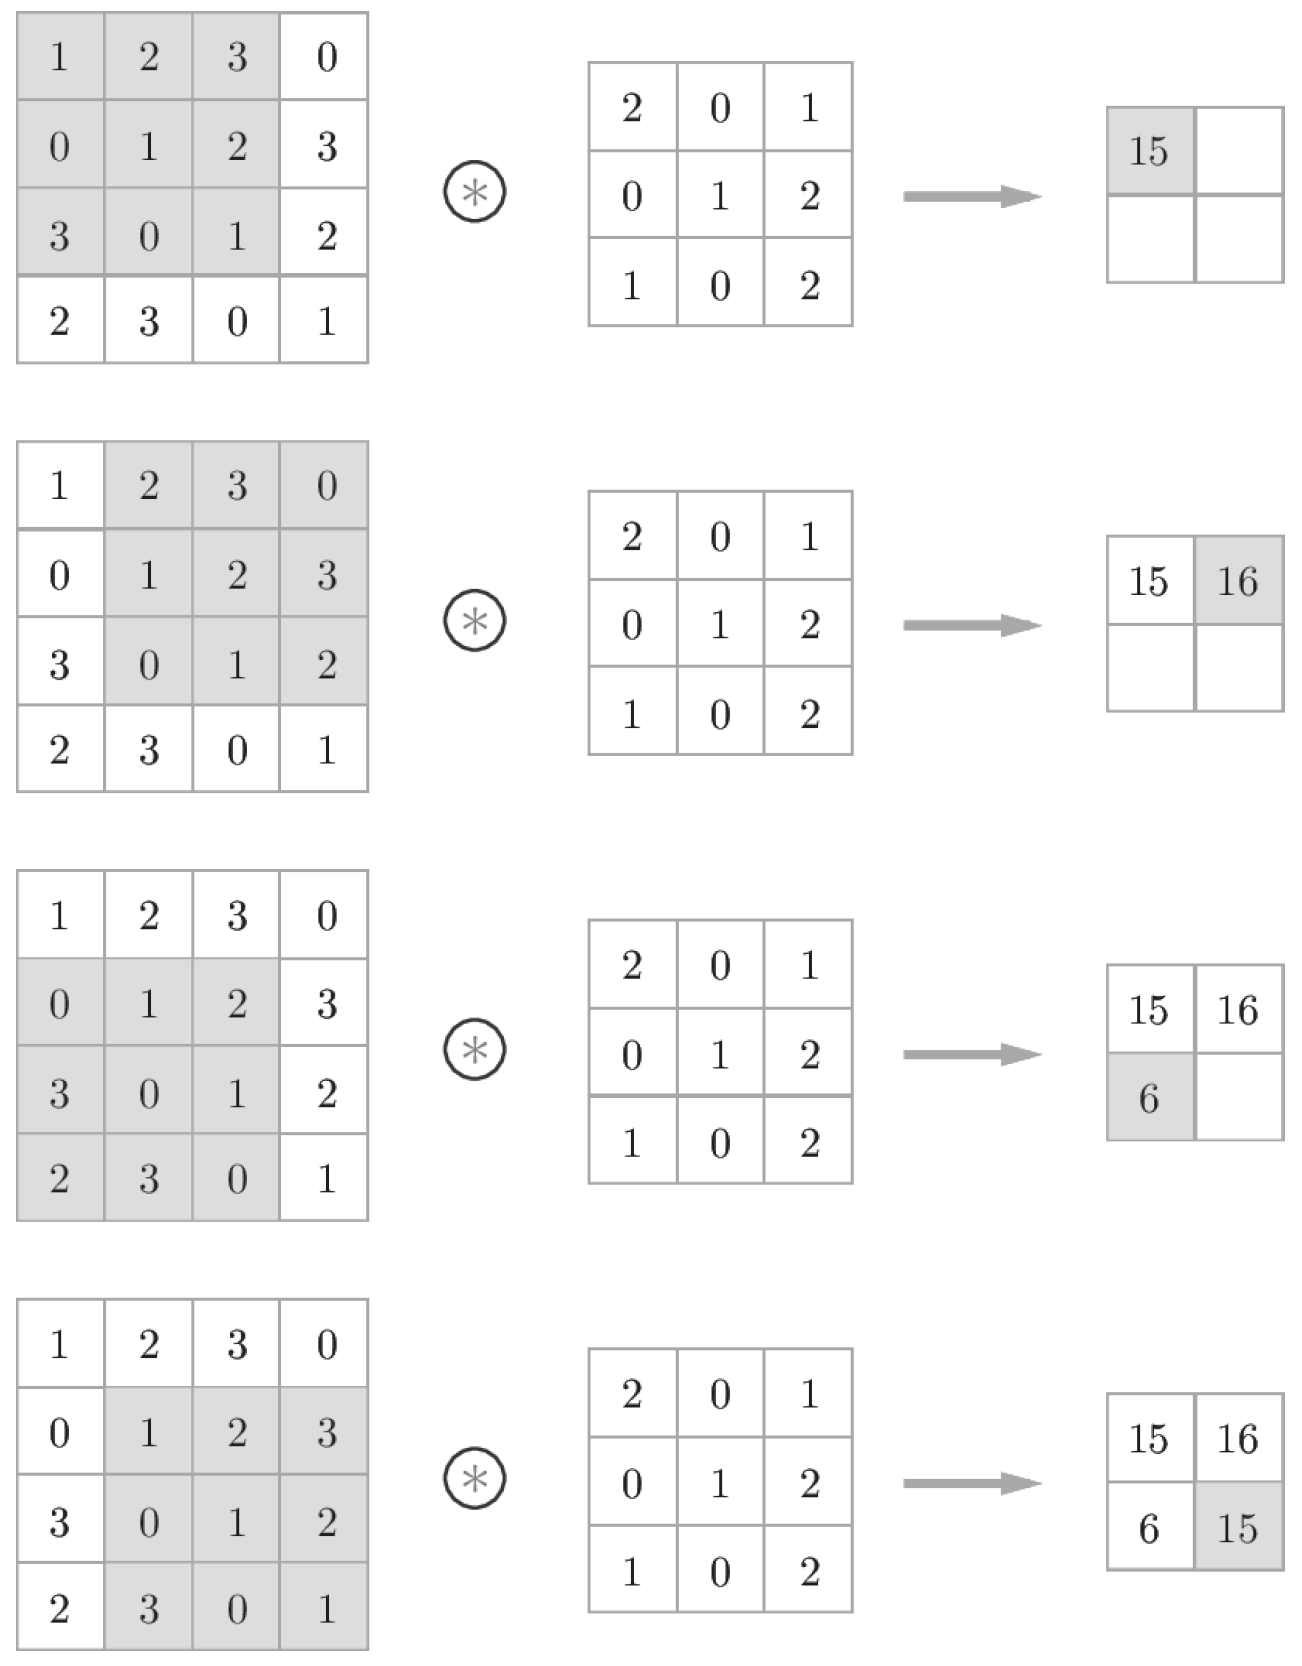
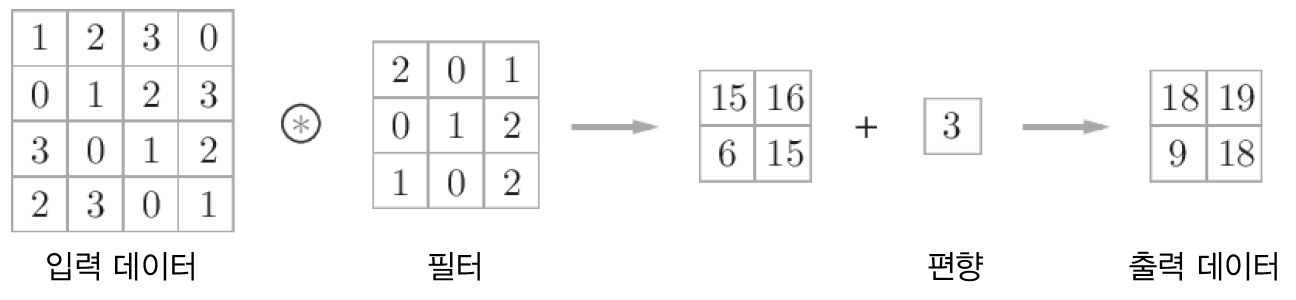

#### 7.2.3 패딩
#### - 패딩(padding) : 입력 데이터 주변을 특정 값(ex 0)으로 채움, 출력 크기를 조정할 목적으로 활용
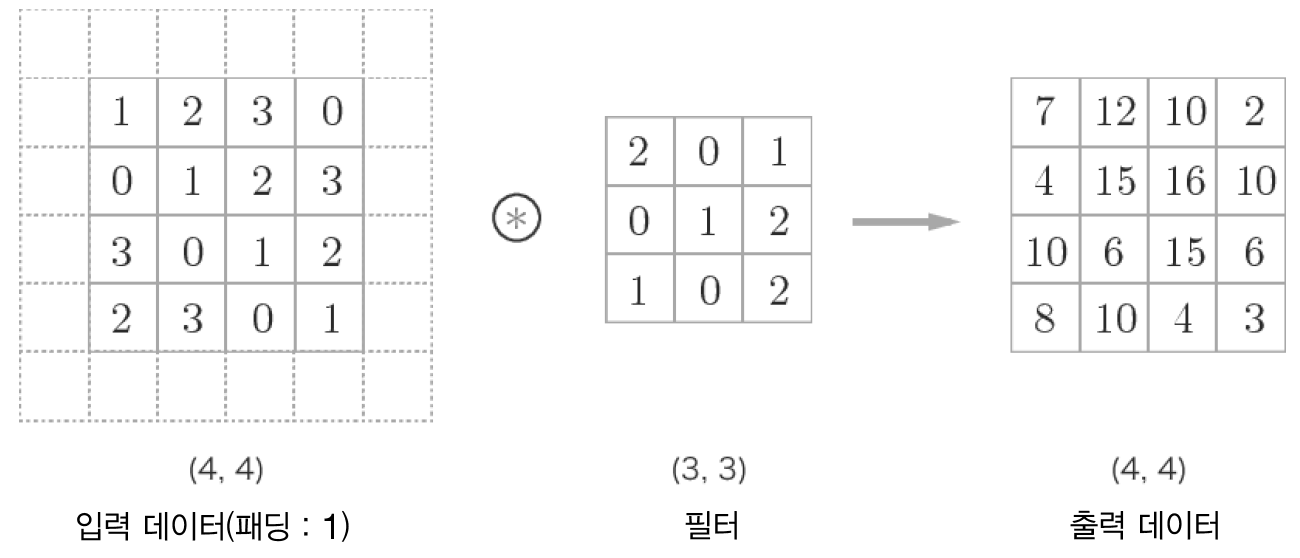

#### 7.2.4 스트라이드
#### - 필터를 적용하는 위치의 간격
#### - 스트라이드를 키우면 출력크기는 감소, 패딩을 키우면 출력크기는 증가
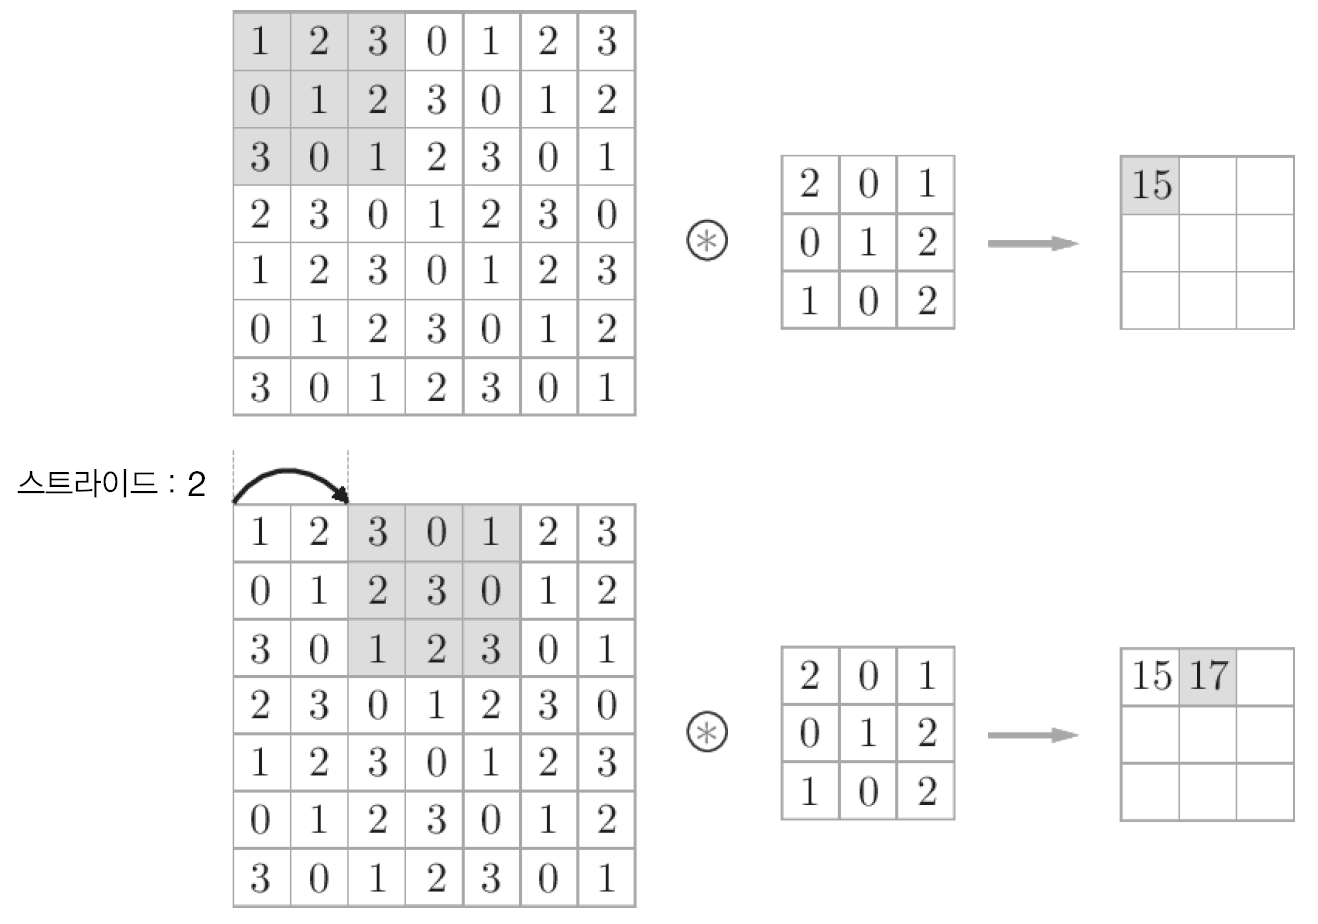
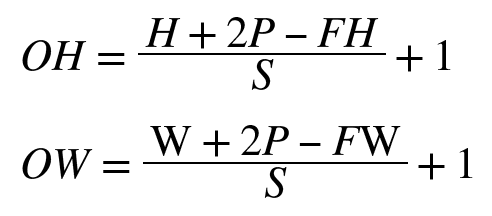

#### 7.2.5 3차원 데이터의 합성곱 연산
#### - 입력 데이터의 채널수와 필터의 채널 수가 같아야 함, 모든 채널의 필터는 동일 크기
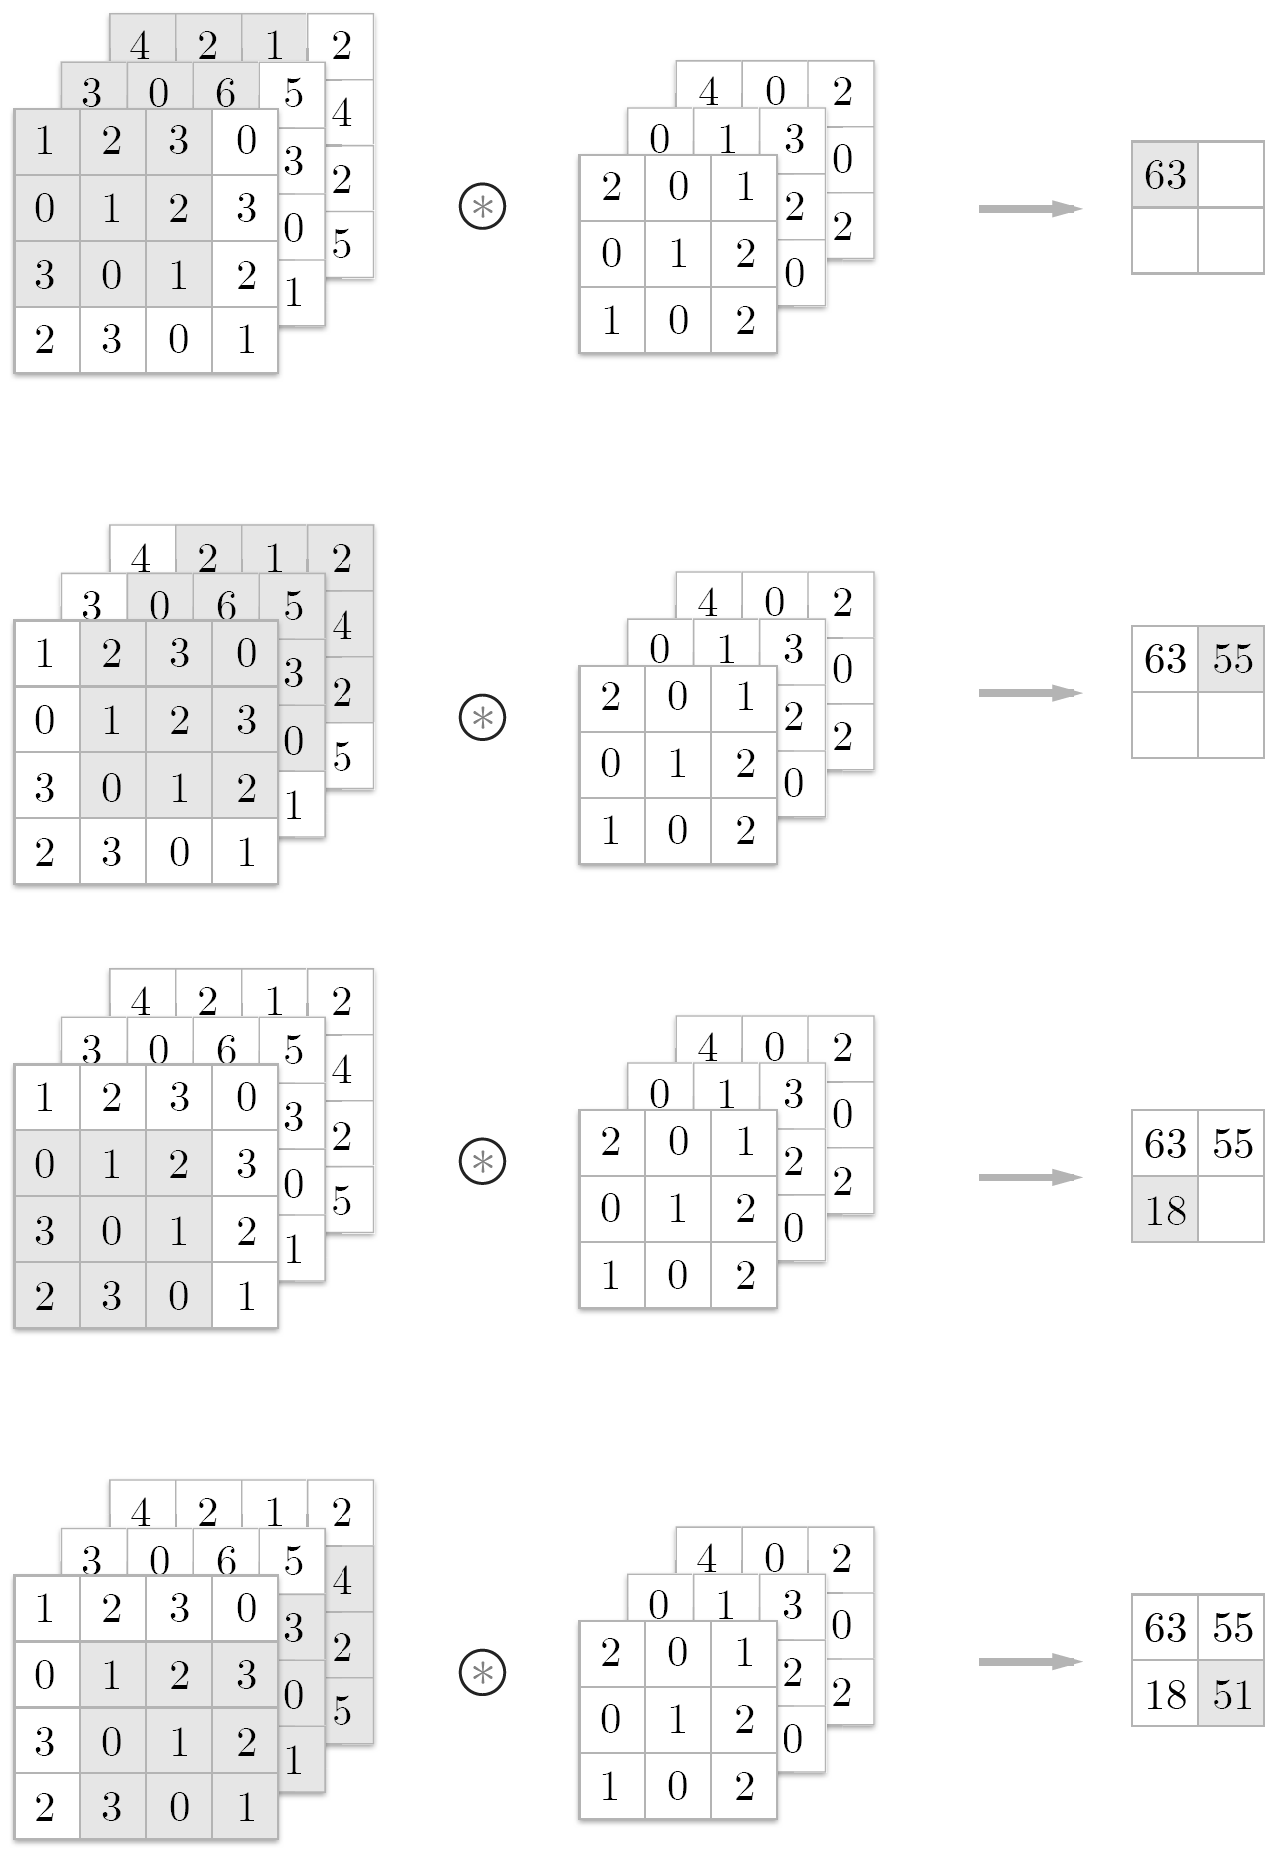

#### 7.2.6 블록으로 생각하기
#### - (채널수, 높이, 너비)
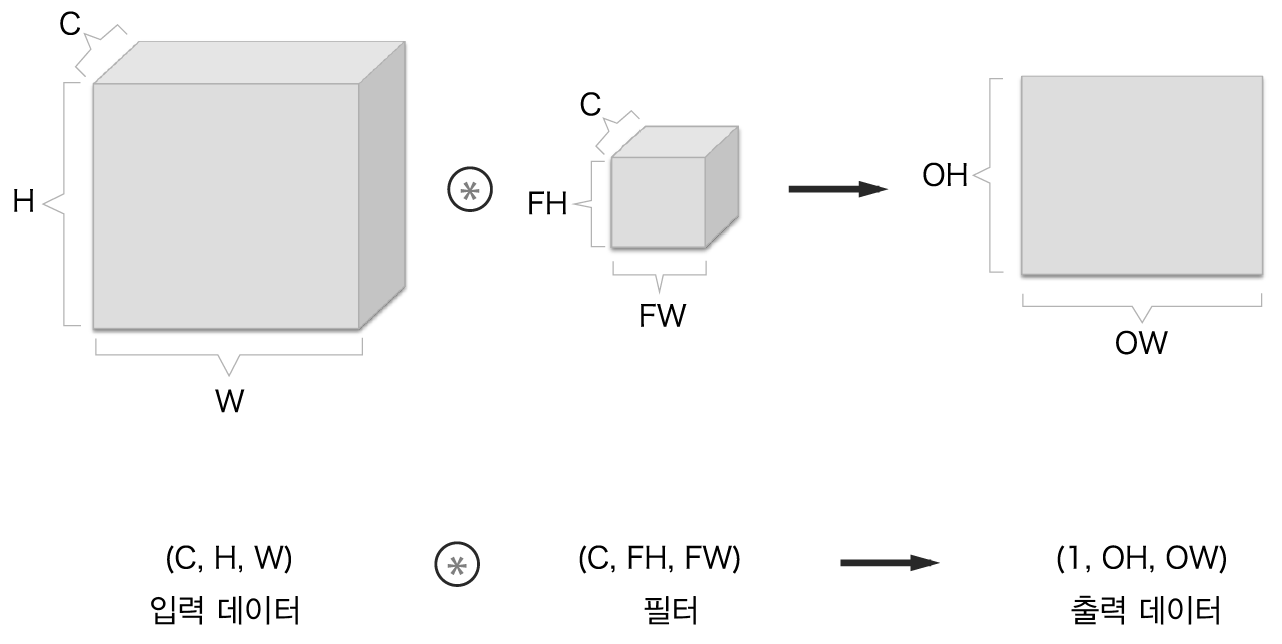
#### - (출력 채널 수, 입력 채널 수, 높이, 너비)
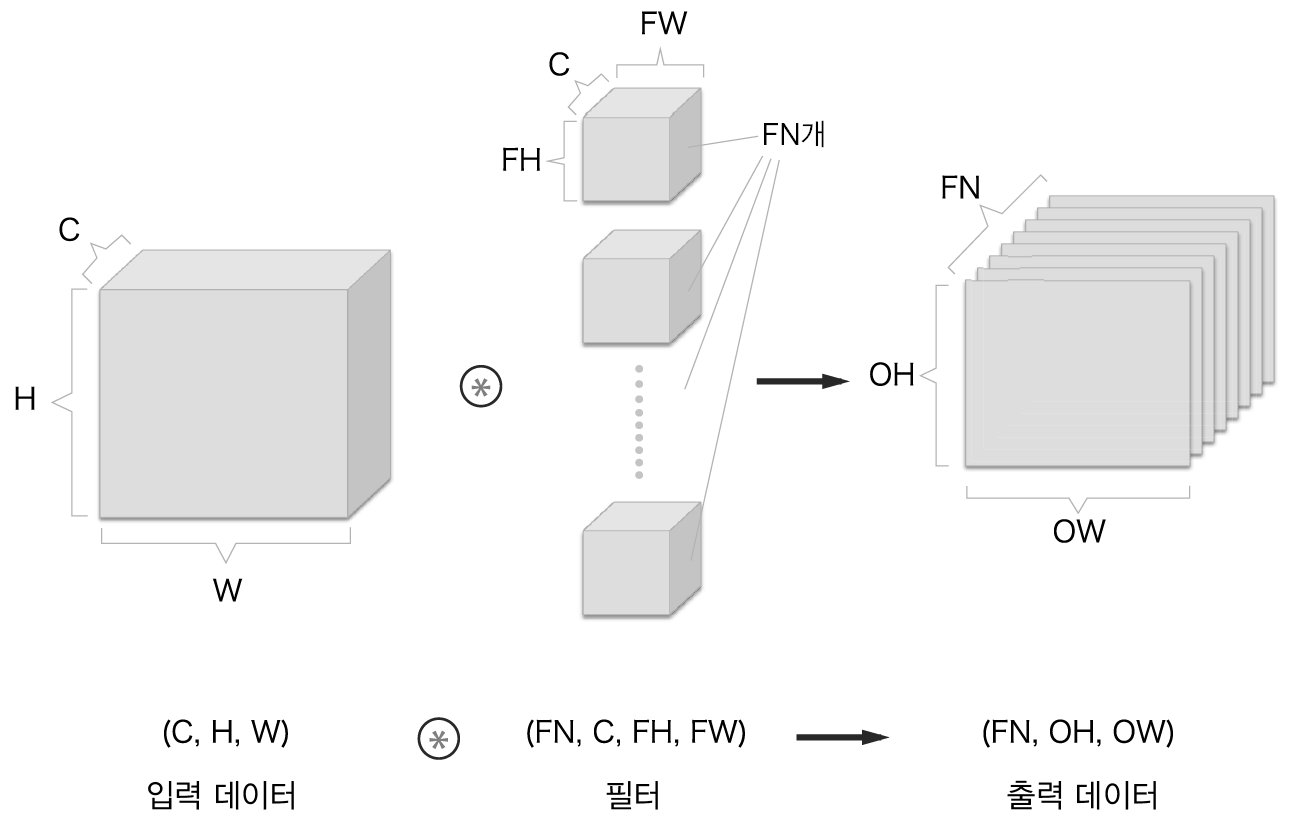
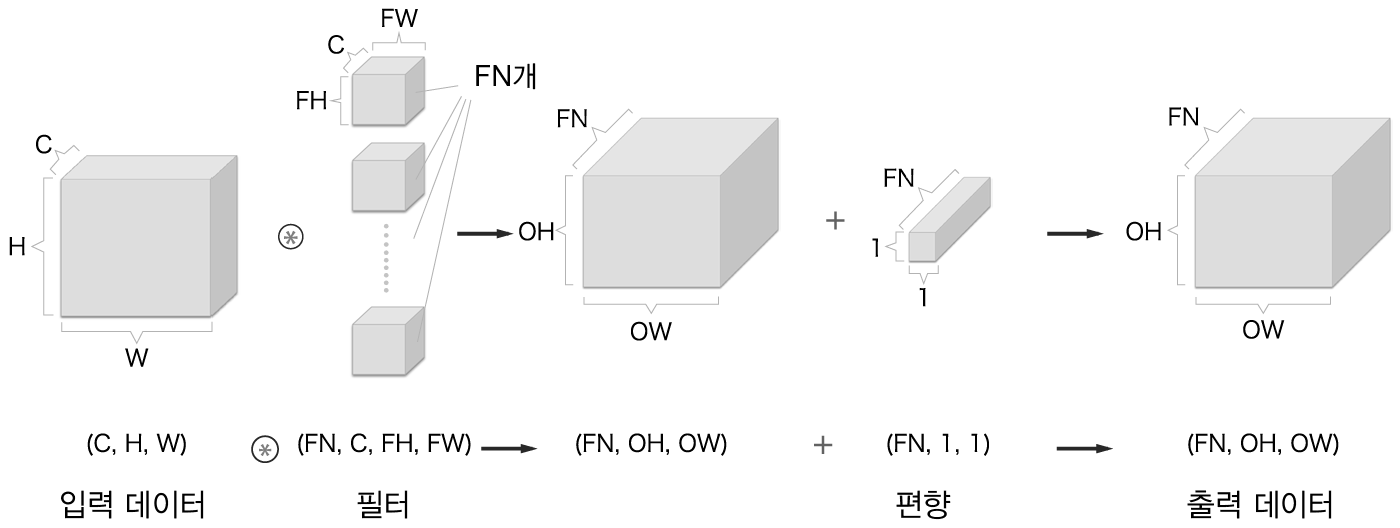

#### 7.2.7 배치 처리
#### - 데이터 : (데이터 수, 채널 수, 높이, 너비)
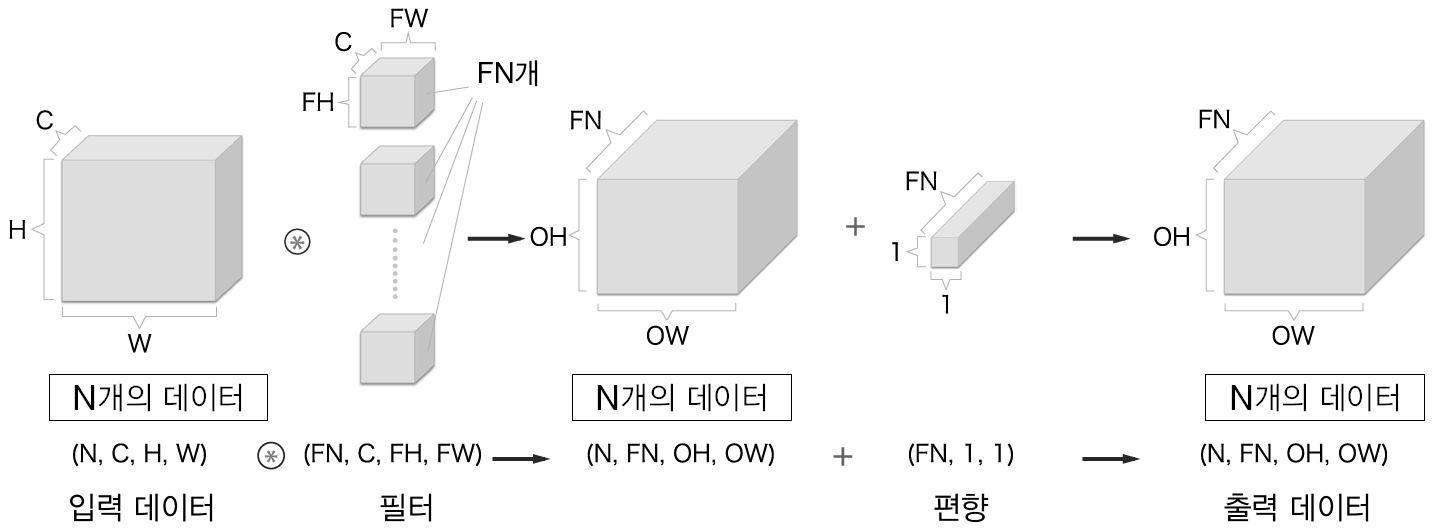

### 7.3 풀링 계층
#### - 풀링 : 세로, 가로 방향의 공간을 줄이는 연산
#### - 풀링의 윈도우 크기 = 스트라이드 크기
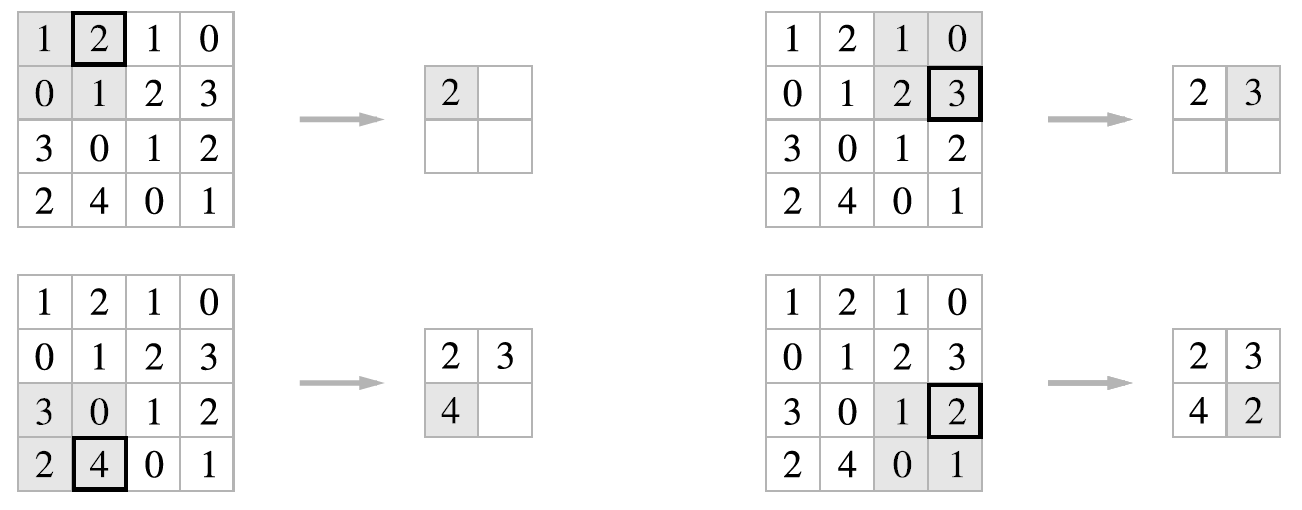
#### 7.3.1 풀링 계층의 특징
#### - 학습해야 할 매개변수가 없다.
#### - 채널 수가 변하지 않음
#### - 입력의 변화에 영향을 적게 받음
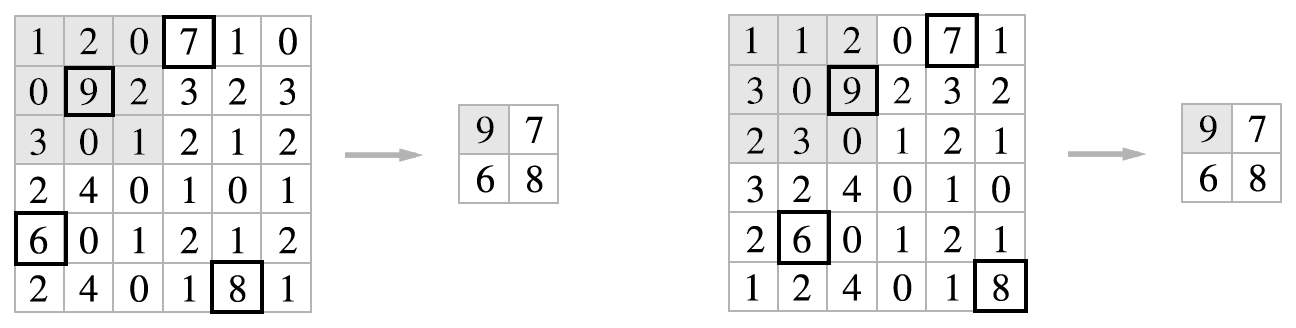

### 7.4 합성곱/풀링 계층 구현하기
#### 7.4.1 4차원 배열

In [1]:
import numpy as np

x = np.random.randn(10, 1, 28, 28)
print(x.shape)
print(x[0].shape)
print(x[1].shape)

(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)


#### 7.4.2 im2col(image to column)로 데이터 전개하기
#### - 넘파이에서는 원소에 접근할 때 for 문을 사용하지 않는 것이 바람직
#### - im2col : 입력 데이터를 필터링(가중치 계산)하기 좋게 전개(펼치는)하는 함수, 필터를 적용하는 영역을 한줄로 늘어놓음
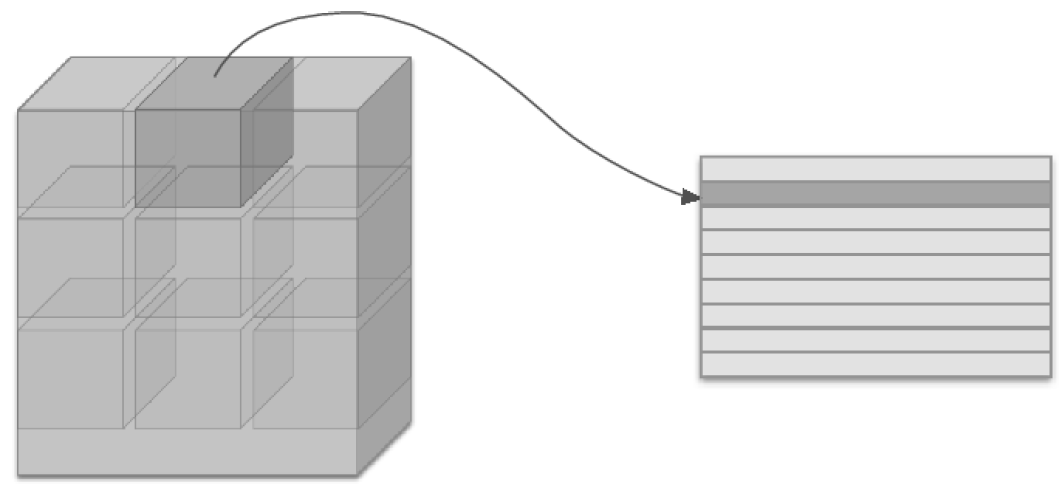
#### - im2col로 전개하면 원소 수가 원래 블록수보다 많아져서 메모리를 더 많이 소비
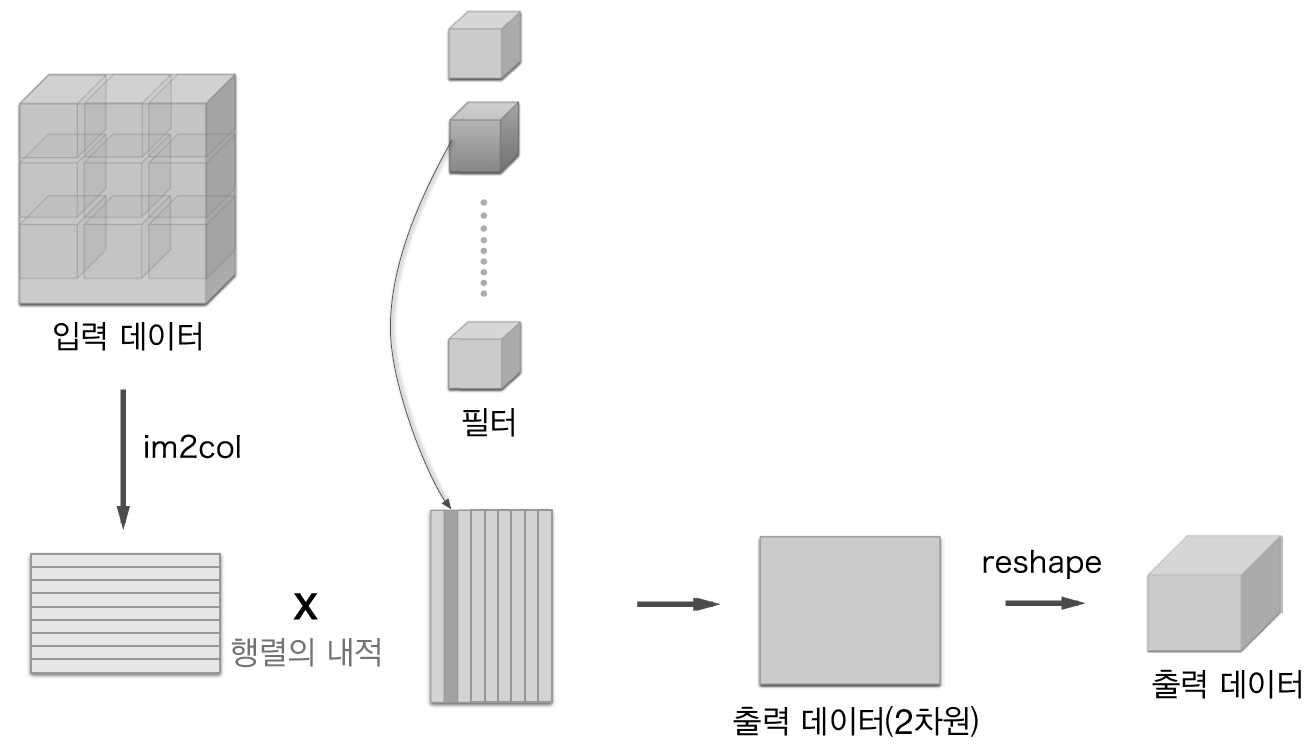

#### 7.4.3 합성곱 계층 구현하기

In [4]:
def im2col(x, fh, fw, stride, pad):
    pass

class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+ (H + 2*self.pad - FH) / self.stride)
        out_w = int(1+ (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).trnaspose(0,3,1,2)
        
        return out

#### 7.4.4 풀링 계층 구현하기
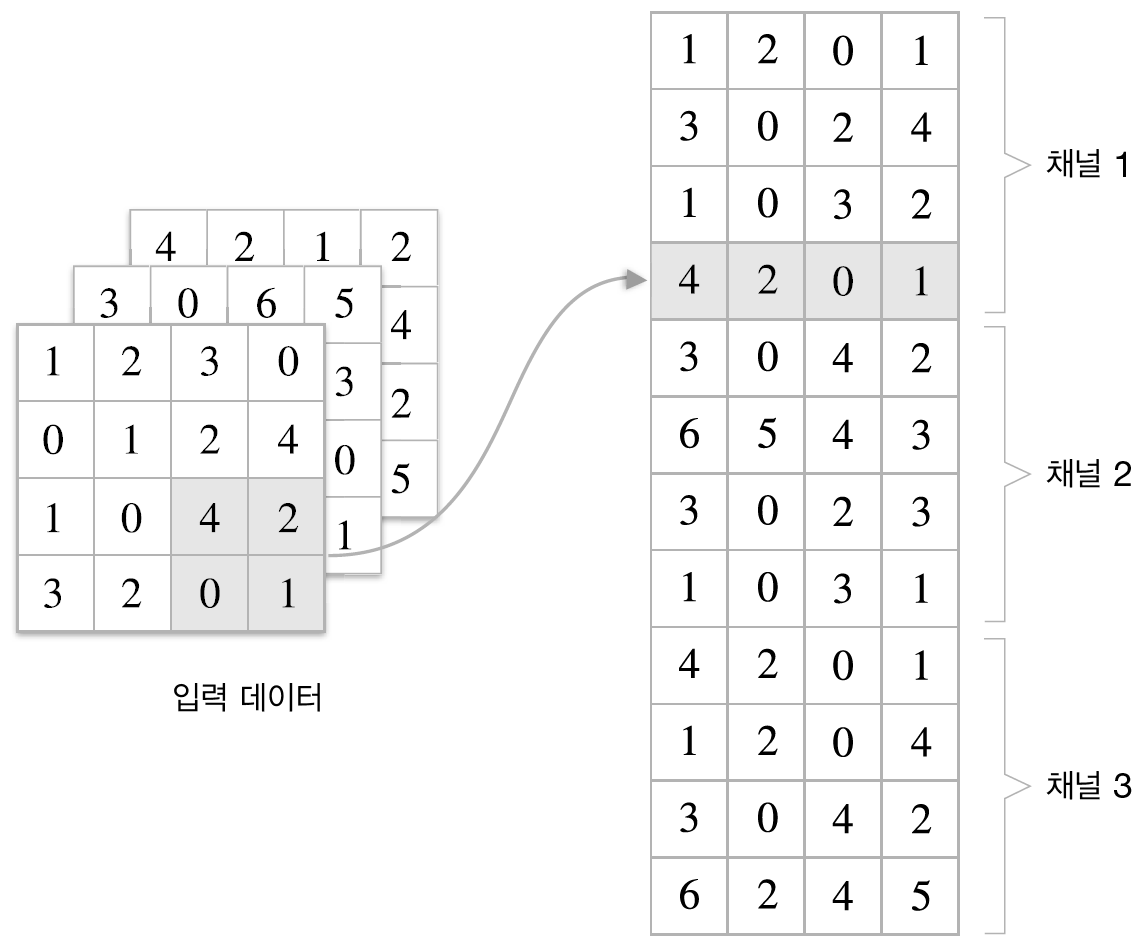
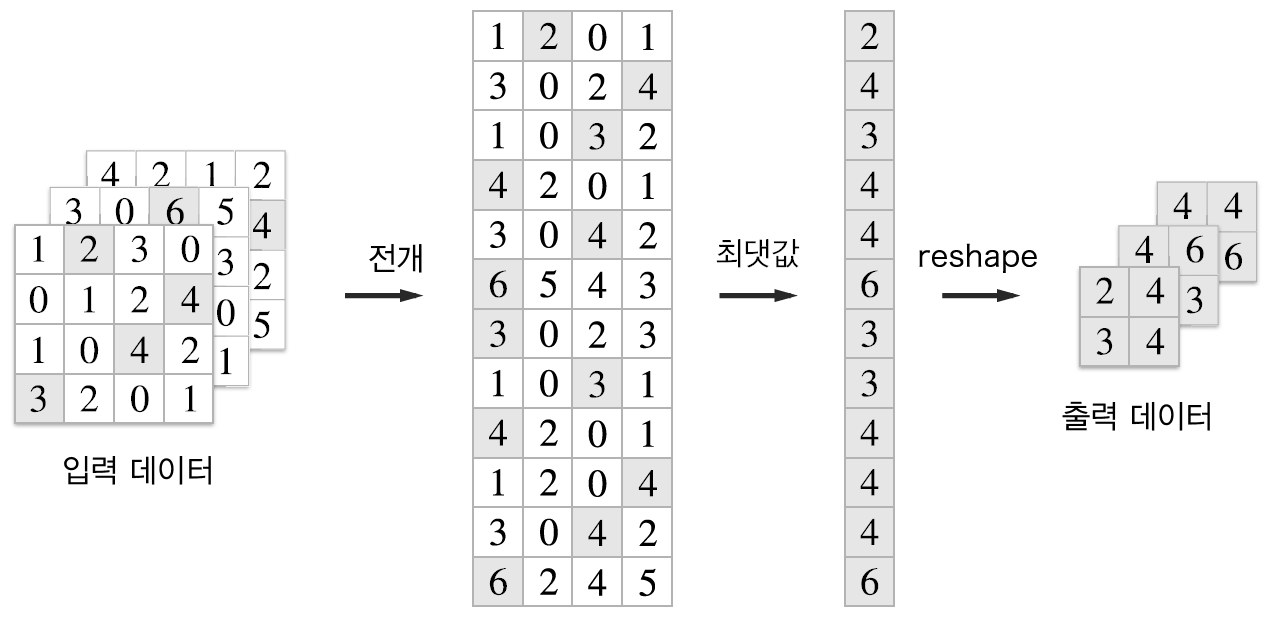

In [5]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1+ (H - self.pool_h) / self.stride)
        out_w = int(1+ (W - self.pool_w) / self.stride)
        
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        out = np.max(col, axis =1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out

### 7.5 CNN 구현하기
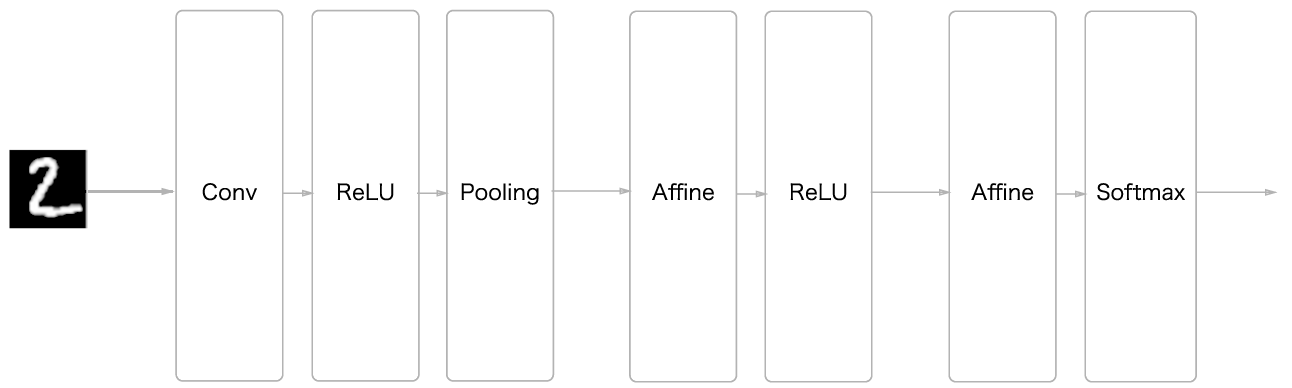
#### - filter_num : 필터 수 / filter_size : 필터 크기 / stride : 스트라이드 / pad : 패딩 / hidden_size ; 은닉층의 뉴런수
#### - output_size : 출력층의 뉴런수 / weight_init_std : 초기화 때의 가중치 표준편차

In [ ]:
import numpy as np
from collections import OrderDict
class SimpleConvNet:
    def __init__(self, input_dim = (1,28,28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, 
                hidden_size = 100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride +1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        self.params= {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def gradient(self, x, t):
        self.loss(x, t)
        
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads

#### - 계층이 깊어질수록 추출되는 정보는 더 추상화 된다.
#### - 처음 층은 단순한 에지에 반응하고, 이어서 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화한다.
#### - 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화 = 사물의 '의미'를 이해하도록 변화

### 7.7 대표적인 CNN
#### 7.7.1 LeNet
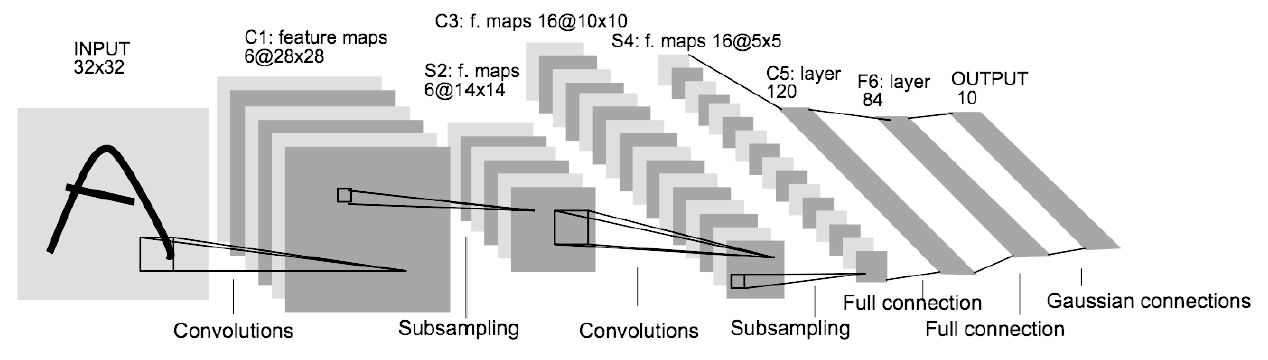
#### - LeNet은 활성화 함수로 시그모이드 사용 / 서브샘플링을 통하여 중간 데이터의 크기를 줄임
#### 7.7.2 AlexNet
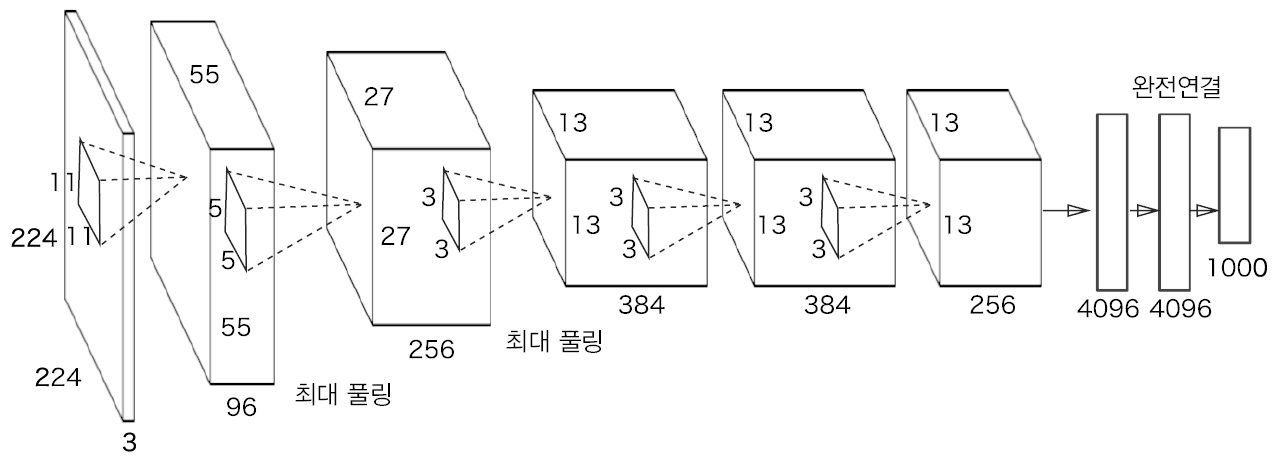
#### - AlexNet은 활성화 함수로 ReLU 사용 / LRN(Local Response Normalization)이라는 국소적 정규화 계층 사용 / 드랍아웃 사용